# Slice and dice data

In [1]:
import pandas as pd
import seaborn as sns

# Constant

In [2]:
DATA_DIR: str = "../data/titanic"

# Dataframe

In [19]:
df = pd.read_csv(
    f"{DATA_DIR}/train.csv"
)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


# Unique Values

In [20]:
sorted(df["Pclass"][df["Pclass"].notna()].unique())

[1, 2, 3]

In [21]:
sorted(df["Embarked"][df["Embarked"].notna()].unique())

['C', 'Q', 'S']

In [22]:
sorted(df["SibSp"][df["SibSp"].notna()].unique())

[0, 1, 2, 3, 4, 5, 8]

# Categorical string to Number

In [23]:
df.replace({
    'Sex': {"male": 0, "female": 1},
    "Embarked": {'C': 0, 'Q': 1, 'S': 2}
}, inplace=True)

# Drop columns

In [24]:
df.drop(labels=["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)

# Data distribution

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Sex'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>,
        <Axes: title={'center': 'Embarked'}>, <Axes: >]], dtype=object)

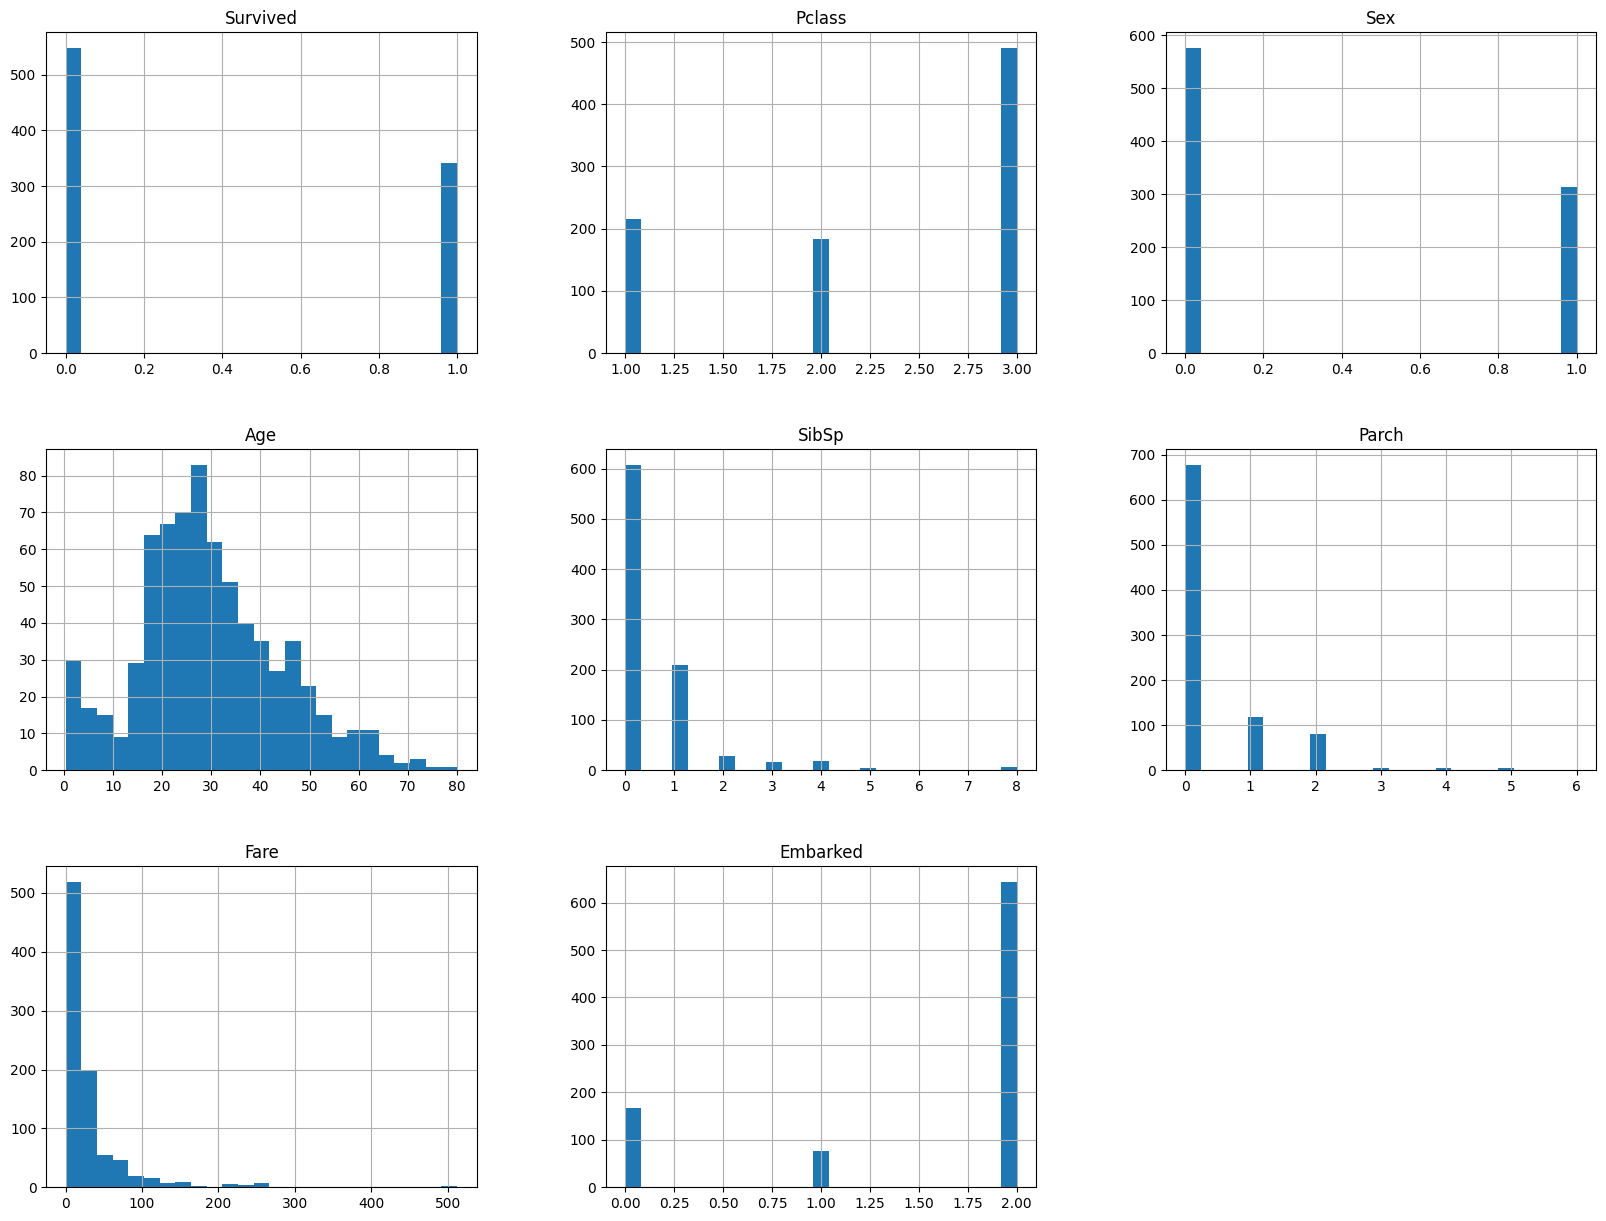

In [25]:
df.hist(bins=25, figsize=(20, 15))

---
# (Pclass, Suvived)

See if Pclass correlates with Suvived.

In [27]:
pclass_suvived_df = pd.DataFrame(df.groupby(["Pclass", "Survived"]).size())
pclass_suvived_df

0
Pclass Survived     
1      0          80
       1         136
2      0          97
       1          87
3      0         372
       1         119

### Convert to long format

Grouped By dataframe cannot be pivoted to convert into wide format. Re-index the dataframe so that each line will be a row.


In [28]:
pclass_suvived_df.reset_index(inplace=True, drop=False)
pclass_suvived_df

,Pclass,Survived,0
0,1,0,80
1,1,1,136
2,2,0,97
3,2,1,87
4,3,0,372
5,3,1,119


### Pivot

Row/Object ID(index) is ```Pclass```, object attributes(columns) is ```Survived```,  values is Series value ```0```.

In [66]:
pclass_suvived_df_pivoted = pclass_suvived_df.pivot(
    index="Pclass",
    columns="Survived",
    values=0   # There is only one column in Series
)
pclass_suvived_df_pivoted

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [69]:
pclass_suvived_df_pivoted[2] = pclass_suvived_df_pivoted[0] + pclass_suvived_df_pivoted[1]
pclass_suvived_df_pivoted[0] = pclass_suvived_df_pivoted[0].div(pclass_suvived_df_pivoted[2])
pclass_suvived_df_pivoted[1] = pclass_suvived_df_pivoted[1].div(pclass_suvived_df_pivoted[2])
pclass_suvived_df_pivoted.drop([2], inplace=True, axis=1)
pclass_suvived_df_pivoted

Survived,0,1
Pclass,,
1,0.370370,0.629630
3,0.757637,0.242363


## Plot (Suvival per Pclass)

<Axes: xlabel='Pclass'>

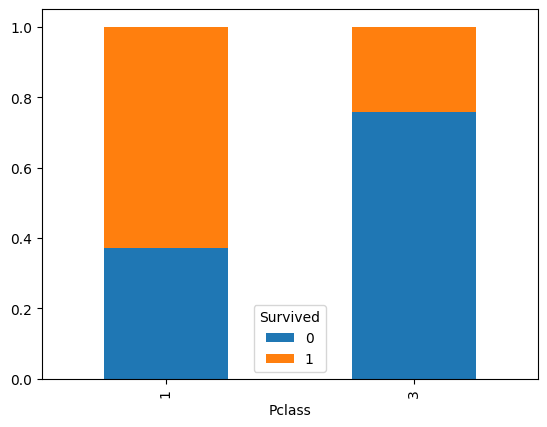

In [70]:
pclass_suvived_df_pivoted.plot(kind="bar", stacked=True)

---
# (Sex, Suvived)

Check if Sex correlates with Suvived.

In [33]:
sex_suvived_df = pd.DataFrame(df.groupby(["Sex", "Survived"]).size())
sex_suvived_df

0
Sex Survived     
0   0         468
    1         109
1   0          81
    1         233

In [35]:
sex_suvived_df.reset_index(inplace=True, drop=False)
sex_suvived_df_pivoted = sex_suvived_df.pivot(
    index="Sex",
    columns="Survived",
    values=0
)
sex_suvived_df_pivoted

Survived,0,1
Sex,,
0,468,109
1,81,233


In [71]:
sex_suvived_df_pivoted[2] = sex_suvived_df_pivoted[0] + sex_suvived_df_pivoted[1]
sex_suvived_df_pivoted[0] = sex_suvived_df_pivoted[0].div(sex_suvived_df_pivoted[2])
sex_suvived_df_pivoted[1] = sex_suvived_df_pivoted[1].div(sex_suvived_df_pivoted[2])
sex_suvived_df_pivoted.drop([2], inplace=True, axis=1)
sex_suvived_df_pivoted

Survived,0,1
Sex,,
0,0.811092,0.188908
1,0.257962,0.742038


<Axes: xlabel='Sex'>

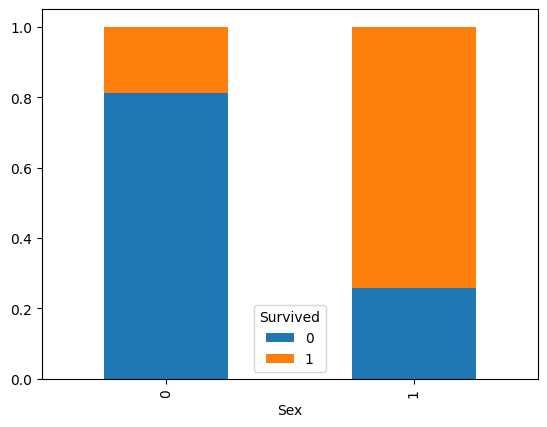

In [72]:
sex_suvived_df_pivoted.plot(kind="bar", stacked=True)

---
# (Embarked, Suvived)

In [38]:
embarked_suvived_df = pd.DataFrame(df.groupby(["Embarked", "Survived"]).size())
embarked_suvived_df
embarked_suvived_df.reset_index(inplace=True, drop=False)
embarked_suvived_df_pivoted = embarked_suvived_df.pivot(
    index="Embarked",
    columns="Survived",
    values=0
)
embarked_suvived_df_pivoted

Survived,0,1
Embarked,,
0.0,75,93
1.0,47,30
2.0,427,217


In [73]:
embarked_suvived_df_pivoted[2] = embarked_suvived_df_pivoted[0] + embarked_suvived_df_pivoted[1]
embarked_suvived_df_pivoted[0] = embarked_suvived_df_pivoted[0].div(embarked_suvived_df_pivoted[2])
embarked_suvived_df_pivoted[1] = embarked_suvived_df_pivoted[1].div(embarked_suvived_df_pivoted[2])
embarked_suvived_df_pivoted.drop([2], inplace=True, axis=1)
embarked_suvived_df_pivoted

Survived,0,1
Embarked,,
0.0,0.446429,0.553571
1.0,0.610390,0.389610
2.0,0.663043,0.336957


<Axes: xlabel='Embarked'>

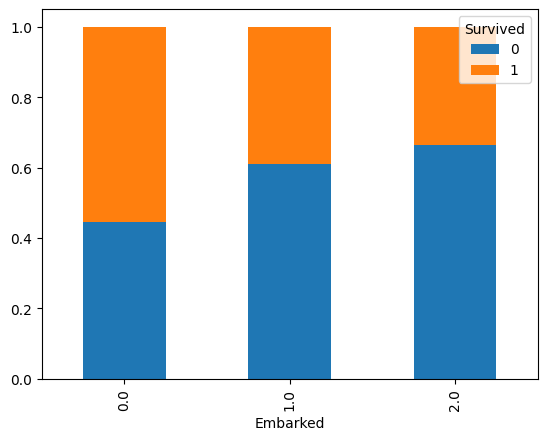

In [74]:
embarked_suvived_df_pivoted.plot(kind="bar", stacked=True)

---
# (Emberked, Pclass)

In [78]:
embarked_pclass_df = pd.DataFrame(df.groupby(["Embarked", "Pclass"]).size())
embarked_pclass_df
embarked_pclass_df.reset_index(inplace=True, drop=False)
embarked_pclass_df_pivoted = embarked_pclass_df.pivot(
    index="Embarked",
    columns="Pclass",
    values=0
)
embarked_pclass_df_pivoted

Pclass,1,2,3
Embarked,,,
0.0,85,17,66
1.0,2,3,72
2.0,127,164,353


In [80]:
embarked_pclass_df_pivoted[4] = embarked_pclass_df_pivoted[1] + embarked_pclass_df_pivoted[2] + embarked_pclass_df_pivoted[3]
embarked_pclass_df_pivoted[1] = embarked_pclass_df_pivoted[1].div(embarked_pclass_df_pivoted[4])
embarked_pclass_df_pivoted[2] = embarked_pclass_df_pivoted[2].div(embarked_pclass_df_pivoted[4])
embarked_pclass_df_pivoted[3] = embarked_pclass_df_pivoted[3].div(embarked_pclass_df_pivoted[4])
embarked_pclass_df_pivoted.drop([4], inplace=True, axis=1)
embarked_pclass_df_pivoted

Pclass,1,2,3
Embarked,,,
0.0,0.505952,0.101190,0.392857
1.0,0.025974,0.038961,0.935065
2.0,0.197205,0.254658,0.548137


<Axes: xlabel='Embarked'>

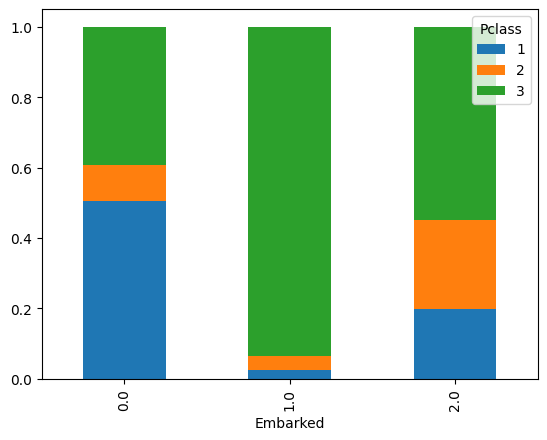

In [81]:
embarked_pclass_df_pivoted.plot(kind="bar", stacked=True)

---
# (Embarked, Pclass, Survived)

In [84]:
embarked_pclass_survived_df = pd.DataFrame(df.groupby(["Embarked", "Pclass", "Survived"]).size())
embarked_pclass_survived_df.reset_index(inplace=True, drop=False)
embarked_pclass_survived_df

,Embarked,Pclass,Survived,0
0,0.0,1,0,26
1,0.0,1,1,59
2,0.0,2,0,8
3,0.0,2,1,9
4,0.0,3,0,41
5,0.0,3,1,25
6,1.0,1,0,1
7,1.0,1,1,1
8,1.0,2,0,1
9,1.0,2,1,2


In [89]:
embarked_pclass_survived_df_pivoted = embarked_pclass_survived_df.pivot(
    index=["Embarked", "Pclass"],
    columns="Survived",
    values=0
)
embarked_pclass_survived_df_pivoted

Survived           0   1
Embarked Pclass         
0.0      1        26  59
         2         8   9
         3        41  25
1.0      1         1   1
         2         1   2
         3        45  27
2.0      1        53  74
         2        88  76
         3       286  67

In [90]:
embarked_pclass_survived_df_pivoted[9] = embarked_pclass_survived_df_pivoted[0] + \
    embarked_pclass_survived_df_pivoted[1]
embarked_pclass_survived_df_pivoted[0] = embarked_pclass_survived_df_pivoted[0].div(
    embarked_pclass_survived_df_pivoted[9]
)
embarked_pclass_survived_df_pivoted[1] = embarked_pclass_survived_df_pivoted[1].div(
    embarked_pclass_survived_df_pivoted[9]
)

In [92]:
embarked_pclass_survived_df_pivoted.drop(9, inplace=True, axis=1)
embarked_pclass_survived_df_pivoted

Survived                0         1
Embarked Pclass                    
0.0      1       0.305882  0.694118
         2       0.470588  0.529412
         3       0.621212  0.378788
1.0      1       0.500000  0.500000
         2       0.333333  0.666667
         3       0.625000  0.375000
2.0      1       0.417323  0.582677
         2       0.536585  0.463415
         3       0.810198  0.189802

<Axes: xlabel='Embarked,Pclass'>

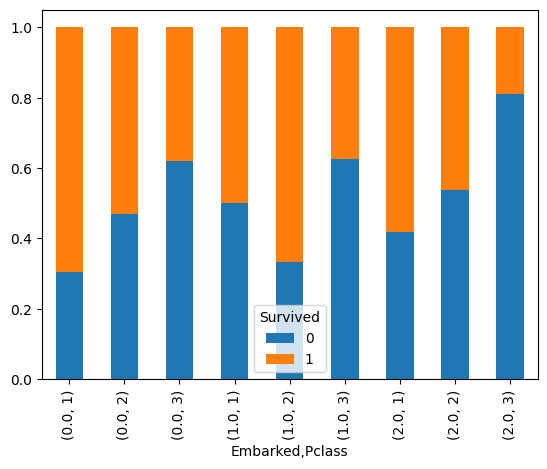

In [93]:
embarked_pclass_survived_df_pivoted.plot(kind="bar", stacked=True)